### Simple Linear Regression 
One input for an output

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
dataset = pd.read_csv("placement.csv")
dataset.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [5]:
dataset.isnull().sum()

cgpa       0
package    0
dtype: int64

### We need to decide the input and output. We know y is dependent on x so y is package and x is cgpa. So, let's separate them

x = dataset["cgpa"]

x.ndim

#### we need to have x as 2 dim dataset for ML we can simply do that by adding extra []. y has to be one dimensional.

In [6]:
x = dataset[["cgpa"]]
y = dataset["package"]

#### Graph the dataset to confirm if it is linear or not.

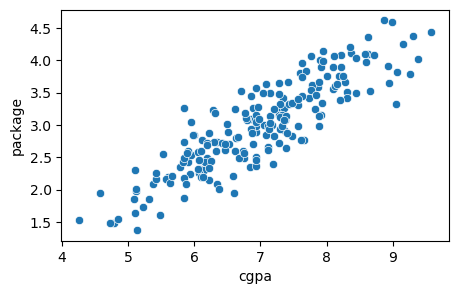

In [16]:
plt.figure(figsize=(5,3))
sns.scatterplot(x="cgpa", y="package", data = dataset)
plt.show()

#### We can use regplot or lmplot to see the linearness. Difference is lmplot allows multiple outputs in the same plot

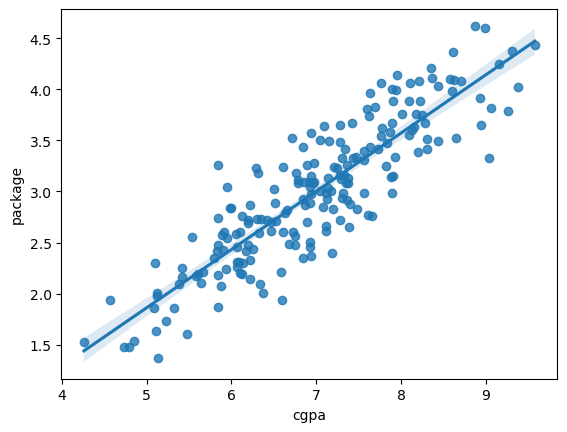

In [17]:
sns.regplot(data = dataset, x= dataset['cgpa'], y=dataset['package']) #or x=x, y=y
plt.show()

#### Split data from train and test

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2, random_state =42 )

In [26]:
lr = LinearRegression()
lr.fit(x_train, y_train) #we do it on the train data
#fit will train our data with y=mx+c to give us the best value for m and c to get the perfect line for our prediction

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [55]:
# accuracy
lr.score(x_test, y_test) *100

79.02126681036793

In [27]:
# to predict our model let's pick a value from cgpa and see if it gives the corresponding package value
# keep in mind, x is 2dim
lr.predict([[6.89]])

/opt/miniconda3/envs/ds/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.92962016])

we can see the value is almost close but not really, we can further train it for more accuracy. Let's find the accuracy score

Our model is 77% accurate. We can improve it

In [34]:
lr.coef_ #this is m
# since this is positive, our angle is between 0-90, 

array([0.57425647])

In [35]:
lr.intercept_ #this is c i.e. intercept
# since it is negative, it cuts the negative x-axis

np.float64(-1.0270069374542108)

y = 0.57425647x-1.0270069374542108 (y=mx+c)

let's put 6.8 for x. we will get the same predict value

#### Let's draw the y=mx+c line in the plot.

In [54]:
y_prediction = lr.predict(x) #predict for each value of x i.e. cgpa

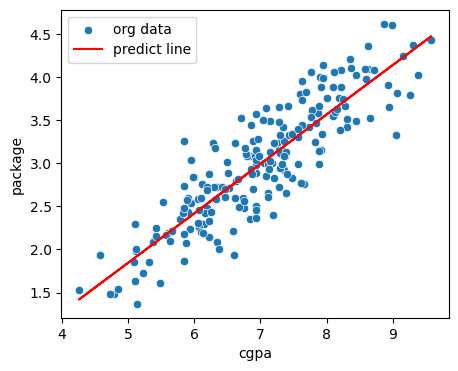

In [52]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=dataset, x="cgpa", y="package")
plt.plot(dataset["cgpa"], y_prediction, c="red") #this is the x and y for the line
plt.legend(["org data","predict line"])
#save to your device
# plt.savefig("prediction plot.jpg") 
plt.show()